# Level 3

## Task 3 : Price Range vs. Online Delivery and Table Booking

* Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
* Determine if higher-priced restaurants are more likely to offer these services.

### Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
#loading the dataset from my Google Drive shared folder
url = "https://drive.google.com/uc?export=download&id=1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y"
df = pd.read_csv(url)
#previewing first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking the total number of rows and columns
df.shape

(9551, 21)

In [4]:
#checking the overall structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Analyzing if there is a relationship between the price range and the availability of online delivery and table booking

In [11]:
#calculating the percentage of restaurants offering online delivery and table booking per price range
online_delivery_summary = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
table_booking_summary = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100

#reordering columns, rounding values to 1 decimal place, and renaming columns
online_delivery_summary = online_delivery_summary[['Yes', 'No']].round(1)
online_delivery_summary.columns = ['Yes (%)', 'No (%)']

table_booking_summary = table_booking_summary[['Yes', 'No']].round(1)
table_booking_summary.columns = ['Yes (%)', 'No (%)']

print("Price range vs. Online delivery :\n\n" , online_delivery_summary)
print("\n\nPrice range vs. Table booking :\n\n" , table_booking_summary)

Price range vs. Online delivery :

              Yes (%)  No (%)
Price range                 
1               15.8    84.2
2               41.3    58.7
3               29.2    70.8
4                9.0    91.0


Price range vs. Table booking :

              Yes (%)  No (%)
Price range                 
1                0.0   100.0
2                7.7    92.3
3               45.7    54.3
4               46.8    53.2


### Visualizing using Stacked Bar Chart

<Figure size 1000x500 with 0 Axes>

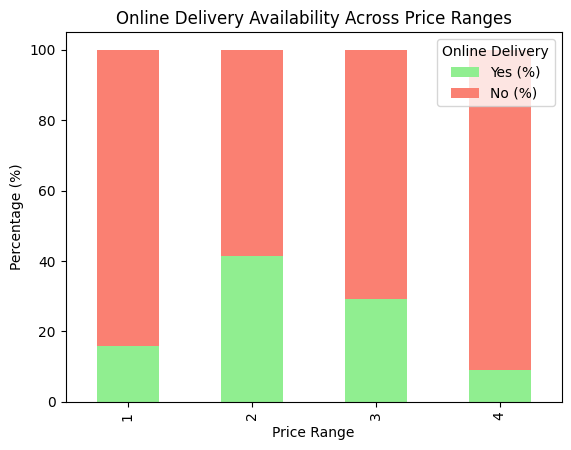

<Figure size 1000x500 with 0 Axes>

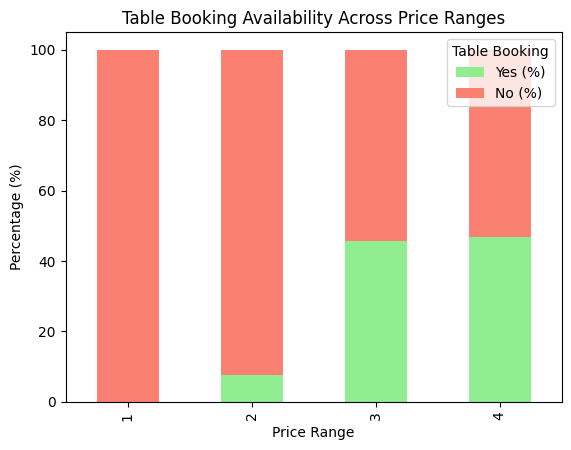

In [18]:
# Online delivery vs. price range
plt.figure(figsize=(10, 5))
online_delivery_summary.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title("Online Delivery Availability Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Percentage (%)")
plt.legend(title="Online Delivery")
plt.show()

# Table booking vs. price range
plt.figure(figsize=(10, 5))
table_booking_summary.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title("Table Booking Availability Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Percentage (%)")
plt.legend(title="Table Booking")
plt.show()

### Determining if higher-priced restaurants are more likely to offer these services

In [12]:
#checking if the percentage of "Yes" for online delivery and table booking increases with price range
online_trend = online_delivery_summary['Yes (%)'].is_monotonic_increasing
table_booking_trend = table_booking_summary['Yes (%)'].is_monotonic_increasing

#printing conclusions
if online_trend:
    print("Higher-priced restaurants are more likely to offer online delivery.")
else:
    print("Online delivery availability does not consistently increase with price range.")

if table_booking_trend:
    print("Higher-priced restaurants are more likely to offer table booking.")
else:
    print("Table booking availability does not consistently increase with price range.")


Online delivery availability does not consistently increase with price range.
Higher-priced restaurants are more likely to offer table booking.
